# Homework4 [Project] 
#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/26 (Tues)  11:59 PM [NO LATE HAND IN(Late hand in will get 0), because of school grade policy]

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
- __This is project assignment. We can not reply your questions about technical(code) issues.__
- __이번 과제는 프로젝트 과제입니다. 소스코드와 같은 기술적인 질문에는 답변 드릴 수 없습니다.__

<br>
<br>
*Perform the steps described below for each dataset(2 Project).*
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

### When you make your model for this Project, you should use scikit learn. Don't use other ML package.
### Of course you can use any packages for handling your data. (pandas, numpy, matplotlib, random etc.)
### Download your data in *https://www.dropbox.com/sh/6s4e0z9fhenfw6z/AADkJO3Z6WN1b8IJhkVp9KgDa?dl=0*

## Project 1
### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [387]:
tune = pd.read_csv("h1b_dev.csv", sep=',',index_col=0);
tune

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2126700,CERTIFIED,"INFODAT INTERNATIONAL, INC.",Computer Systems Analysts,SYSTEMS ANALYST,Y,54496.0,2013.0,"HOUSTON, TEXAS",-95.369803,29.760427
808611,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,TECHNOLOGY LEAD - US,Y,62046.0,2015.0,"SAN ANTONIO, TEXAS",-98.493628,29.424122
1622128,CERTIFIED,"ASPEN DENTAL ASSOCIATES OF WESTERN PA, PC","Dentists, General",DENTIST (ASSOCIATE),N,97635.2,2014.0,"SOUTH LEBANON, OHIO",NaN,NaN
1477017,CERTIFIED,RUSH UNIVERSITY MEDICAL CENTER,"Physicians and Surgeons, All Other",INSTRUCTOR AND NEURORADIOLOGIST,Y,101130.0,2014.0,"CHICAGO, ILLINOIS",-87.629798,41.878114
1315460,CERTIFIED,ACCENTURE LLP,Computer Programmers,COMPUTER PROGRAMMER/CONFIGURER 3,Y,75982.0,2014.0,"NORTH ANDOVER, MASSACHUSETTS",-71.135058,42.698702
2044356,CERTIFIED,SCEPTER TECHNOLOGIES INC,Computer Systems Analysts,SYSTEMS ANALYST,Y,67038.0,2013.0,"MINNEAPOLIS, MINNESOTA",-93.265011,44.977753
2592392,CERTIFIED,"BLOODCENTER OF WISCONSIN, INC.","Medical Scientists, Except Epidemiologists",RESEARCH SCIENTIST I,Y,50461.0,2012.0,"MILWAUKEE, WISCONSIN",-87.906474,43.038902
445212,CERTIFIED,"DOTCOM TEAM, LLC",NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,COMPUTER SYSTEMS ADMINISTRATOR,Y,74214.0,2016.0,"BRAINTREE, MASSACHUSETTS",-71.004001,42.207902
2547041,CERTIFIED,RTKL ASSOCIATES INC.,"Architects, Except Landscape and Naval",ARCHITECTURAL DESIGNER,Y,48400.0,2012.0,"LOS ANGELES, CALIFORNIA",-118.243685,34.052234
2128454,CERTIFIED,UNIVERSITY OF WISCONSIN-EAU CLAIRE,"Business Teachers, Postsecondary",ASSISTANT PROFESSOR,Y,48430.0,2013.0,"EAU CLAIRE, WISCONSIN",-91.498494,44.811349


In [388]:
test = pd.read_csv("h1b_test.csv", sep=',',index_col=0);
test
train = pd.read_csv("h1b_train.csv", sep=',', index_col=0);
train

C:\Users\moonyoung\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949
693102,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
2662510,CERTIFIED,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
636434,CERTIFIED,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
2265757,CERTIFIED,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
2927315,CERTIFIED,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970


In [389]:
#dropna
tune = tune.dropna()
train = train.dropna()
test = test.dropna()

In [390]:
#outlier
test.loc[test['PREVAILING_WAGE'] >100000, 'PREVAILING_WAGE'] = 100000
tune.loc[tune['PREVAILING_WAGE'] >100000, 'PREVAILING_WAGE'] = 100000
train.loc[train['PREVAILING_WAGE'] >100000, 'PREVAILING_WAGE'] = 100000

C:\Users\moonyoung\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [391]:
#normalization

avg_wage = tune['PREVAILING_WAGE'].mean()
avg_lon = tune['lon'].mean()
avg_lat = tune['lat'].mean()

sdev_wage = tune['PREVAILING_WAGE'].std()
sdev_lon = tune['lon'].std()
sdev_lat = tune['lat'].std()


tune['PREVAILING_WAGE_Z'] = (tune['PREVAILING_WAGE'] - avg_wage) / sdev_wage
tune['lon_z'] = (tune['lon'] - avg_lon) / sdev_lon
tune['lat_z'] = (tune['lat'] - avg_lat) / sdev_lat
tune = tune.drop(columns=['PREVAILING_WAGE', 'lon', 'lat'])

#lowercase
tune['SOC_NAME'] = tune['SOC_NAME'].str.lower()
tune['EMPLOYER_NAME'] = tune['EMPLOYER_NAME'].str.lower()
tune['JOB_TITLE'] = tune['JOB_TITLE'].str.lower()
tune['WORKSITE'] = tune['WORKSITE'].str.lower()
tune

C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,PREVAILING_WAGE_Z,lon_z,lat_z
2126700,CERTIFIED,"infodat international, inc.",computer systems analysts,systems analyst,Y,2013.0,"houston, texas",-0.722909,-0.166048,-1.796745
808611,CERTIFIED,infosys limited,computer systems analysts,technology lead - us,Y,2015.0,"san antonio, texas",-0.318548,-0.325068,-1.868743
1477017,CERTIFIED,rush university medical center,"physicians and surgeons, all other",instructor and neuroradiologist,Y,2014.0,"chicago, illinois",1.714184,0.227961,0.797471
1315460,CERTIFIED,accenture llp,computer programmers,computer programmer/configurer 3,Y,2014.0,"north andover, massachusetts",0.427834,1.067634,0.973147
2044356,CERTIFIED,scepter technologies inc,computer systems analysts,systems analyst,Y,2013.0,"minneapolis, minnesota",-0.051187,-0.058903,1.461057
2592392,CERTIFIED,"bloodcenter of wisconsin, inc.","medical scientists, except epidemiologists",research scientist i,Y,2012.0,"milwaukee, wisconsin",-0.939014,0.213876,1.045978
445212,CERTIFIED,"dotcom team, llc",network and computer systems administrators,computer systems administrator,Y,2016.0,"braintree, massachusetts",0.333143,1.074305,0.868074
2547041,CERTIFIED,rtkl associates inc.,"architects, except landscape and naval",architectural designer,Y,2012.0,"los angeles, california",-1.049397,-1.330455,-0.877933
2128454,CERTIFIED,university of wisconsin-eau claire,"business teachers, postsecondary",assistant professor,Y,2013.0,"eau claire, wisconsin",-1.047790,0.031023,1.425433
2540370,CERTIFIED,aptiva corp,"software developers, applications",software engineer,Y,2012.0,"north brunswick, new jersey",-0.579213,0.897527,0.492272


In [392]:
avg_wage = test['PREVAILING_WAGE'].mean()
avg_lon = test['lon'].mean()
avg_lat = test['lat'].mean()

sdev_wage = test['PREVAILING_WAGE'].std()
sdev_lon = test['lon'].std()
sdev_lat = test['lat'].std()


test['PREVAILING_WAGE_Z'] = (test['PREVAILING_WAGE'] - avg_wage) / sdev_wage
test['lon_z'] = (test['lon'] - avg_lon) / sdev_lon
test['lat_z'] = (test['lat'] - avg_lat) / sdev_lat
test = test.drop(columns=['PREVAILING_WAGE', 'lon', 'lat'])

#lowercase
test['SOC_NAME'] = test['SOC_NAME'].str.lower()
test['EMPLOYER_NAME'] = test['EMPLOYER_NAME'].str.lower()
test['JOB_TITLE'] = test['JOB_TITLE'].str.lower()
test['WORKSITE'] = test['WORKSITE'].str.lower()
test

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,PREVAILING_WAGE_Z,lon_z,lat_z
2415925,CERTIFIED,albert einstein medical center,healthcare practitioners and technical workers...,medical resident - pgy 3,Y,2012.0,"philadelphia, pennsylvania",-1.288427,0.863012,0.381173
254728,CERTIFIED,tata consultancy services limited,computer programmers,developer,N,2016.0,"hightstown, new jersey",0.047304,0.895605,0.448852
703671,CERTIFIED,trizetto corporation,computer systems analysts,senior consultant,Y,2015.0,"dublin, california",0.476918,-1.511357,-0.099338
2467236,CERTIFIED,mphasis corporation,computer systems analysts,senior systems analyst,Y,2012.0,"westerville, ohio",0.188988,0.468870,0.418238
174623,CERTIFIED,"bizit consultants, inc.",computer systems analysts,sap business systems analyst,Y,2016.0,"tucker, georgia",0.764794,0.403479,-0.920877
175467,CERTIFIED,infosys limited,computer systems analyst,project manager - us,Y,2016.0,"salt lake city, utah",0.273806,-1.001423,0.553738
1373699,CERTIFIED,a1 kaiser inc,computer programmers,programmer analyst,Y,2014.0,"el paso, texas",-1.123245,-0.726979,-1.367703
2302657,CERTIFIED,health and hospitals corporation,psychiatrists,physician specialist 111,N,2012.0,"brooklyn, new york",1.520256,0.925001,0.536101
1962300,CERTIFIED,jamis software corporation,"software developers, applications",senior developer,Y,2013.0,"san diego, california",-0.073222,-1.268963,-1.164035
2616614,CERTIFIED,braves technologies llc,computer systems analysts,systems engineer,Y,2012.0,"woodbury, new york",-0.053126,0.916786,0.682652


In [393]:
avg_wage = train['PREVAILING_WAGE'].mean()
avg_lon = train['lon'].mean()
avg_lat = train['lat'].mean()

sdev_wage = train['PREVAILING_WAGE'].std()
sdev_lon = train['lon'].std()
sdev_lat = train['lat'].std()


train['PREVAILING_WAGE_Z'] = (train['PREVAILING_WAGE'] - avg_wage) / sdev_wage
train['lon_z'] = (train['lon'] - avg_lon) / sdev_lon
train['lat_z'] = (train['lat'] - avg_lat) / sdev_lat
train = train.drop(columns=['PREVAILING_WAGE', 'lon', 'lat'])

#lowercase
train['SOC_NAME'] = train['SOC_NAME'].str.lower()
train['EMPLOYER_NAME'] = train['EMPLOYER_NAME'].str.lower()
train['JOB_TITLE'] = train['JOB_TITLE'].str.lower()
train['WORKSITE'] = train['WORKSITE'].str.lower()
train
#lowercase
train['SOC_NAME'] = train['SOC_NAME'].str.lower()
train['EMPLOYER_NAME'] = train['EMPLOYER_NAME'].str.lower()
train['JOB_TITLE'] = train['JOB_TITLE'].str.lower()
train['WORKSITE'] = train['WORKSITE'].str.lower()
train

C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,PREVAILING_WAGE_Z,lon_z,lat_z
1349742,CERTIFIED,"international systems technologies, inc.",computer programmers,programmer analyst,Y,2014.0,"sunnyvale, california",-0.342823,-1.522033,-0.168889
789205,CERTIFIED,google inc.,network and computer systems administrators,site reliability engineer,Y,2015.0,"san francisco, california",0.597953,-1.541525,-0.081991
1617140,CERTIFIED,wipro limited,"computer occupations, all other",project manager,Y,2014.0,"el segundo, california",0.315962,-1.337838,-0.907050
2757905,CERTIFIED,"cpo services, inc.",orthotists and prosthetists,staff prosthetist,Y,2011.0,"peoria, illinois",-0.342823,0.129027,0.542561
1127948,WITHDRAWN,value software products inc,computer systems analysts,solutions architect,Y,2015.0,"manassas, virginia",0.194419,0.745425,0.126859
693102,DENIED,"university of california, san diego","medical scientists, except epidemiologists",assistant project scientist,Y,2015.0,"la jolla, california",-1.386171,-1.279565,-1.139513
2662510,CERTIFIED,google inc.,"computer software engineers, applications",software engineer,Y,2011.0,"mountain view, california",0.752883,-1.524450,-0.165204
636434,CERTIFIED,"comprehab, inc.",physical therapists,physical therapist,N,2016.0,"gastonia, north carolina",-0.204614,0.556541,-0.619694
2265757,CERTIFIED,jpmorgan chase and co.,"software developers, applications",applications developer,Y,2012.0,"columbus, ohio",1.325816,0.464364,0.385825
2927315,CERTIFIED,"ironbridge consulting, llc","information security analysts, web developers,...",software engineer/ network analyst,Y,2011.0,"arlington, virginia",-0.542339,0.764176,0.154467


In [394]:
tune['CORP'] = np.nan
tune['CORP'][tune['EMPLOYER_NAME'].str.contains('inc')] = 1
tune['CORP'][tune['EMPLOYER_NAME'].str.contains('corp')] = 1
tune['CORP'][tune['EMPLOYER_NAME'].str.contains('company')] = 1
tune['CORP']=tune['CORP'].replace(np.nan, 0, regex=True)

test['CORP'] = np.nan
test['CORP'][test['EMPLOYER_NAME'].str.contains('inc')] = 1
test['CORP'][test['EMPLOYER_NAME'].str.contains('corp')] = 1
test['CORP'][test['EMPLOYER_NAME'].str.contains('company')] = 1
test['CORP']=test['CORP'].replace(np.nan, 0, regex=True)

train['CORP'] = np.nan
train['CORP'][train['EMPLOYER_NAME'].str.contains('inc')] = 1
train['CORP'][train['EMPLOYER_NAME'].str.contains('corp')] = 1
train['CORP'][train['EMPLOYER_NAME'].str.contains('company')] =1
train['CORP']=train['CORP'].replace(np.nan, 0, regex=True)

C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\moonyoun

In [395]:
test.loc[test['FULL_TIME_POSITION'] == 'Y', 'FULL_TIME_POSITION'] = 1
test.loc[test['FULL_TIME_POSITION'] == 'N', 'FULL_TIME_POSITION'] = 0
train.loc[train['FULL_TIME_POSITION'] == 'Y', 'FULL_TIME_POSITION'] = 1
train.loc[train['FULL_TIME_POSITION'] == 'N', 'FULL_TIME_POSITION'] = 0
tune.loc[tune['FULL_TIME_POSITION'] == 'Y', 'FULL_TIME_POSITION'] = 1
tune.loc[tune['FULL_TIME_POSITION'] == 'N', 'FULL_TIME_POSITION'] = 0

In [396]:
tune['JOB_TITLE2'] = np.nan
tune['JOB_TITLE2'][tune['JOB_TITLE'].str.contains('analysts')] = 1
tune['JOB_TITLE2'][tune['JOB_TITLE'].str.contains('managers')] = 1
tune['JOB_TITLE2'][tune['JOB_TITLE'].str.contains('engineer')] = 1
tune['JOB_TITLE2'][tune['JOB_TITLE'].str.contains('developer')] = 1
tune['JOB_TITLE2']=tune['JOB_TITLE2'].replace(np.nan, 0, regex=True)

train['JOB_TITLE2'] = np.nan
train['JOB_TITLE2'][train['JOB_TITLE'].str.contains('analysts')] = 1
train['JOB_TITLE2'][train['JOB_TITLE'].str.contains('managers')] = 1
train['JOB_TITLE2'][train['JOB_TITLE'].str.contains('engineer')] = 1
train['JOB_TITLE2'][train['JOB_TITLE'].str.contains('developer')] = 1
train['JOB_TITLE2']=train['JOB_TITLE2'].replace(np.nan, 0, regex=True)

test['JOB_TITLE2'] = np.nan
test['JOB_TITLE2'][test['JOB_TITLE'].str.contains('analysts')] = 1
test['JOB_TITLE2'][test['JOB_TITLE'].str.contains('managers')] = 1
test['JOB_TITLE2'][test['JOB_TITLE'].str.contains('engineer')] = 1
test['JOB_TITLE2'][test['JOB_TITLE'].str.contains('developer')] = 1
test['JOB_TITLE2']=test['JOB_TITLE2'].replace(np.nan, 0, regex=True)

C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\moonyoun

In [397]:
tune = tune.drop(columns=['EMPLOYER_NAME', 'WORKSITE','JOB_TITLE','SOC_NAME'])
train = train.drop(columns=['EMPLOYER_NAME','WORKSITE','JOB_TITLE','SOC_NAME'])
test = test.drop(columns=['EMPLOYER_NAME','WORKSITE','JOB_TITLE','SOC_NAME'])

train

,CASE_STATUS,FULL_TIME_POSITION,YEAR,PREVAILING_WAGE_Z,lon_z,lat_z,CORP,JOB_TITLE2
1349742,CERTIFIED,1,2014.0,-0.342823,-1.522033,-0.168889,1.0,0.0
789205,CERTIFIED,1,2015.0,0.597953,-1.541525,-0.081991,1.0,1.0
1617140,CERTIFIED,1,2014.0,0.315962,-1.337838,-0.907050,0.0,0.0
2757905,CERTIFIED,1,2011.0,-0.342823,0.129027,0.542561,1.0,0.0
1127948,WITHDRAWN,1,2015.0,0.194419,0.745425,0.126859,1.0,0.0
693102,DENIED,1,2015.0,-1.386171,-1.279565,-1.139513,0.0,0.0
2662510,CERTIFIED,1,2011.0,0.752883,-1.524450,-0.165204,1.0,1.0
636434,CERTIFIED,0,2016.0,-0.204614,0.556541,-0.619694,1.0,0.0
2265757,CERTIFIED,1,2012.0,1.325816,0.464364,0.385825,0.0,1.0
2927315,CERTIFIED,1,2011.0,-0.542339,0.764176,0.154467,0.0,1.0


In [401]:
tune['CASE_STATUS1'] = np.nan
tune['CASE_STATUS1'][tune['CASE_STATUS'].str.contains('DENIED')] = 0
tune['CASE_STATUS1']=tune['CASE_STATUS1'].replace(np.nan, 1, regex=True)

test['CASE_STATUS1'] = np.nan
test['CASE_STATUS1'][test['CASE_STATUS'].str.contains('DENIED')] = 0
test['CASE_STATUS1']=test['CASE_STATUS1'].replace(np.nan, 1, regex=True)

train['CASE_STATUS1'] = np.nan
train['CASE_STATUS1'][train['CASE_STATUS'].str.contains('DENIED')] = 0
train['CASE_STATUS1']=train['CASE_STATUS1'].replace(np.nan, 1, regex=True)

C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [404]:
x_train = train[['JOB_TITLE2','FULL_TIME_POSITION','YEAR','PREVAILING_WAGE_Z','lon_z','lat_z']].values
y_train = train[['CASE_STATUS1']].values
x_train

x_test = test[['JOB_TITLE2','FULL_TIME_POSITION','YEAR','PREVAILING_WAGE_Z','lon_z','lat_z']].values
y_test = test[['CASE_STATUS1']].values
x_test

x_tune = tune[['JOB_TITLE2','FULL_TIME_POSITION','YEAR','PREVAILING_WAGE_Z','lon_z','lat_z']].values
y_tune = tune[['CASE_STATUS1']].values
x_tune

array([[ 0.00000000e+00,  1.00000000e+00,  2.01300000e+03,
        -7.22908808e-01, -1.66048383e-01, -1.79674476e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.01500000e+03,
        -3.18547588e-01, -3.25068349e-01, -1.86874259e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.01400000e+03,
         1.71418430e+00,  2.27960601e-01,  7.97470816e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.01500000e+03,
         1.58532429e+00, -1.27534494e+00, -1.16405680e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.01200000e+03,
        -1.35119510e+00,  9.21490164e-01,  5.47991109e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.01600000e+03,
         1.22214900e+00,  9.21490164e-01,  5.47991109e-01]])

In [405]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(x_train,y_train)
sgdscore = clf.score(x_tune, y_tune, sample_weight=None)

print("SGD accuracy : %f"%(sgdscore))

C:\Users\moonyoung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\moonyoung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGD accuracy : 0.970467


In [411]:
sgdscore = clf.score(x_test, y_test, sample_weight=None)

print("SGD accuracy : %f"%(sgdscore))

SGD accuracy : 0.970411


## Project 2
### AAAI Accepted Papers

- Cluster papers using AAAI Accepted Papers data [use __'title'__ as primary key].
- Visualize your clustering result and explain it.
<br>
<br>
- __Your goal is to show clustering result with AAAI Accepted Papers.__
- __You must use 'abstract' feature.__ 
- You can choose the features you want to use in your project.

### Attribute Information

- __Title__
    - Free text; title of the paper 
<br>
<br>
- Groups
    - Categorical; author-selected, high-level keyword(s) 
<br>
<br>
- Keywords
    - Free text; author-generated keywords 
<br>
<br>
- Topics
    - Free text; author-selected, low-level keywords 
<br>
<br>
- __Abstracts__
    - Free text; paper abstracts

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [3]:
tsv = pd.read_csv("AAAI_Accepted_Papers.csv", sep=',', engine='python');
tsv = tsv.replace('\n',' ', regex=True)
tsv = tsv.dropna()
tsv

,title,groups,keywords,topics,abstract
0,The cascade auction ??a mechanism for deterrin...,Mediators Auctions Collusion Ad Exchanges,Multiagent Systems,Auctions and Market-Based Systems E-Commerce G...,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning Sparsity Mirror descent...,Machine Learning Reasoning under Uncertainty,Dimension Reduction/Feature Selection Online L...,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory Coalition Structure Ge...,Multiagent Systems,Coordination and Collaboration Game Theory,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search Parallel Search Multipl...,Heuristic Search and Optimization,Heuristic Search Evaluation and Analysis (Sear...,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising Dynamic Pricing Market Equ...,Multiagent Systems,Auctions and Market-Based Systems E-Commerce M...,We propose a new market design for display adv...
5,Gradient Networks for Shape-Based Object Insta...,object detection instance detection shape grad...,Robotics,"Vision, Object Recognition, and Perception",We present a novel framework for shape-based t...
6,Unified Constraint Propagation on Multi-View Data,pairwise constraint propagation semi-supervise...,Machine Learning,Relational/Graph-Based Learning Semisupervised...,This paper presents a unified framework for in...
7,Progression of Decomposed Situation Calculus T...,reasoning about actions decomposition of logic...,Knowledge Representation and Reasoning,"Action, Change, and Causality",In many tasks related to reasoning about conse...
8,How to Cut a Cake Before the Party Ends,Cake cutting Fair division Computational socia...,Multiagent Systems,Mechanism Design Social Choice / Voting,For decades researchers have struggled with th...
9,Reciprocal Hash Tables for Nearest Neighbor Se...,locality sensitive hashing nearest neighbor se...,Heuristic Search and Optimization Knowledge-Ba...,Search (General/Other) Information Retrieval M...,Recent years have witnessed the success of has...


In [4]:
v = TfidfVectorizer()
x = v.fit_transform(tsv['groups'])
#v2 = TfidfVectorizer()
#x2 = v2.fit_transform(tsv['keywords'])
v3 = TfidfVectorizer()
x3 = v3.fit_transform(tsv['abstract'])
#v4 = TfidfVectorizer()
#x4 = v4.fit_transform(tsv['topics'])
#v5 = TfidfVectorizer()
#x5 = v5.fit_transform(tsv['title'])

df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
#df2 = pd.DataFrame(x2.toarray(), columns = v2.get_feature_names())
df3 = pd.DataFrame(x3.toarray(), columns = v3.get_feature_names())
#df4 = pd.DataFrame(x4.toarray(), columns = v4.get_feature_names())
#df5 = pd.DataFrame(x5.toarray(), columns = v5.get_feature_names())

df2 = pd.concat([df1,df3]).groupby(level=0).sum()
tfidf_matrix = df2
tfidf_matrix

,000,05,06,07,10,100,1000,10kwh,10x,11102,...,詮걊st,詮걒ed,봣or,봳o,셫ultiple,쐀ig,쐀urning,쐁overage,쐒eal,쓉irect
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#tfidf_vectorizer =TfidfVectorizer()
#tfidf_matrix = tfidf_vectorizer.fit_transform(tsv)
#tfidf_matrix.toarray()

In [23]:
numclusters = 3
km = KMeans(n_clusters = numclusters).fit(tfidf_matrix)
clusters = km.labels_.tolist()
print(clusters[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components = 2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[: , 1]

cluster_colors={0: '#e6e6fa', 1:'#9932cc', 2 : '#6a5acd', 3: '#ee82ee', 4:'#969696',5:'#2d2d2d'}
cluster_names = ['0','1','2','3','4','5']

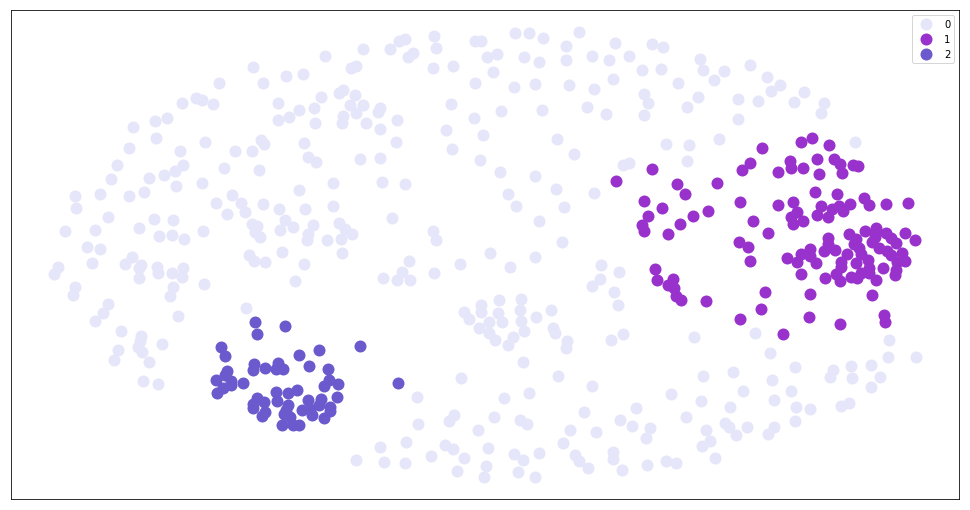

In [25]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name],
                color= cluster_colors[name],
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)

# FIN
## You did a really good job for the short semester. Have a nice vacation!! :) 